In [ ]:
! wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
! ls -al | grep Lenna

--2020-12-15 14:56:10--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png.3’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.1s    

2020-12-15 14:56:10 (4.55 MB/s) - ‘Lenna_(test_image).png.3’ saved [473831/473831]

-rw-r--r-- 1 root root 473831 May 10  2018 Lenna_(test_image).png
-rw-r--r-- 1 root root 473831 May 10  2018 Lenna_(test_image).png.1
-rw-r--r-- 1 root root 473831 May 10  2018 Lenna_(test_image).png.2
-rw-r--r-- 1 root root 473831 May 10  2018 Lenna_(test_image).png.3


<class 'numpy.ndarray'>
uint8


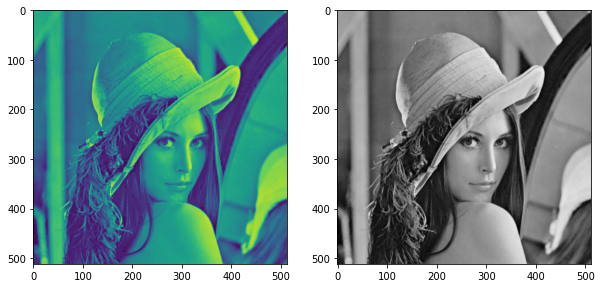

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

image_path = 'Lenna_(test_image).png'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # read image in grayscale, i.e. 1 pixels = 1 value of brightness, NOT 3 RGB values
print(type(img))
print(img.dtype)

fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].imshow(img)
axs[1].imshow(img, cmap='gray') # in grayscale we can interpret values of pixels differently, like in the example below, so we need to specify the 'gray' cmap to tell matplotlib to show the image in grayscale

In [ ]:
img_normalized = img.copy()
img_normalized = img_normalized.astype(np.float64)


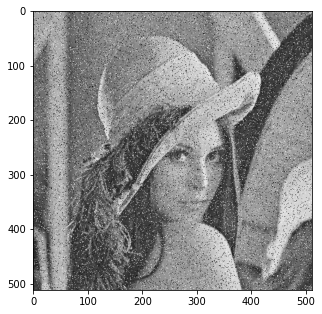

In [ ]:
# Salt N Pepper Noise
import numpy as np
import random
import cv2

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output



noise_img = sp_noise(img_normalized,0.05)
cv2.normalize(noise_img, noise_img, 0, 255, cv2.NORM_MINMAX) # normalize back to 0-255
noise_image = noise_img.astype(np.uint8)

fig, axs = plt.subplots(1, figsize=(5, 10))

axs.imshow(noise_image , cmap='gray')

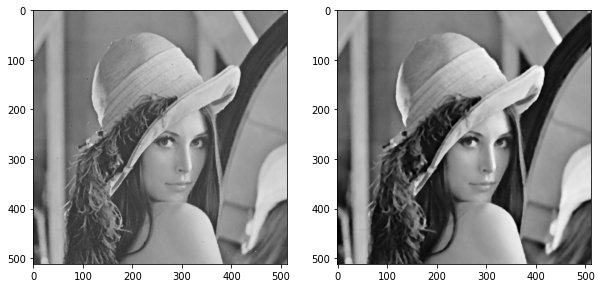

In [ ]:
median = cv2.medianBlur(noise_img, 3)
median1 = cv2.medianBlur(noise_img, 5)
fig, axs = plt.subplots(1,2, figsize=(10, 20))

axs[0].imshow(median, cmap='gray')
axs[1].imshow(median1, cmap='gray')



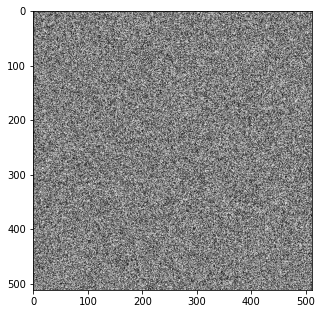

In [ ]:
uniform_noise = np.zeros((img_normalized.shape[1], img_normalized.shape[1]),dtype=np.uint8)
cv2.randu(uniform_noise,0,255)
fig, axs = plt.subplots(1, figsize=(5, 10))

axs.imshow(uniform_noise, cmap='gray')



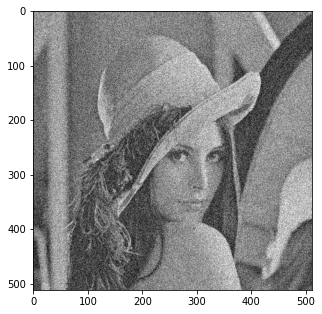

In [ ]:
uniform_noise = (uniform_noise*0.5).astype(np.float64)
noisy_image2 = cv2.add(img_normalized,uniform_noise)
cv2.normalize(noisy_image2,  noisy_image2, 0, 255, cv2.NORM_MINMAX)
noise= noisy_image2.astype(np.uint8) # normalize back to 0-255
 
fig, axs = plt.subplots(1, figsize=(5, 10))

axs.imshow(noise, cmap='gray')

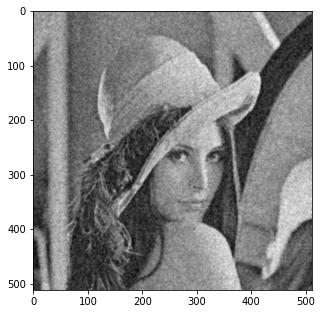

In [ ]:
blur = cv2.GaussianBlur(noise,(5,5),0)
fig, axs = plt.subplots(1, figsize=(5, 10))

axs.imshow(blur, cmap='gray')


In [ ]:
import cv2 as cv


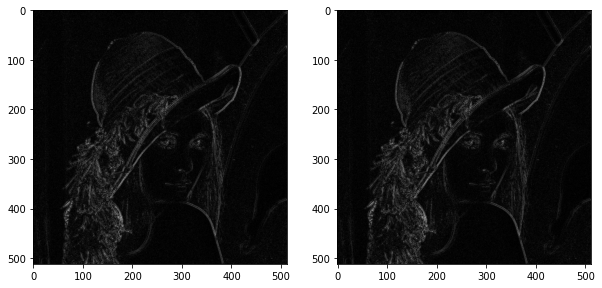

In [ ]:
blur = cv2.GaussianBlur(img,(5,5),0)
image3 = cv.absdiff(img, blur)
image4 = img - blur

fig, axs = plt.subplots(1,2, figsize=(10, 20))

axs[0].imshow(image3, cmap='gray')
axs[1].imshow(image3, cmap='gray')


[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]
[[207.59335249 207.59335249 206.97825973 ... 211.24630174 203.24861623
  187.58997841]
 [207.59335249 207.59335249 206.97825973 ... 211.24630174 203.24861623
  187.58997841]
 [207.59335249 207.59335249 206.97825973 ... 211.24630174 203.24861623
  187.58997841]
 ...
 [116.25403219 116.25403219 122.65806129 ... 171.2454379  168.99704139
  170.49926686]
 [116.25403219 116.25403219 127.74975538 ... 172.72811005 173.46469381
  176.38027101]
 [116.25403219 116.25403219 127.74975538 ... 172.72811005 173.46469381
  176.38027101]]
[[49.19560175 49.19560175 48.04150295 ... 56.56289813 41.53741991
  21.872368  ]
 [49.19560175 49.19560175 48.04150295 ... 56.56289813 41.53741991
  21.872368  ]
 [49.19560175 49.19560175 48.04150295 ... 56.56289813 41.53741991
  21.872368  ]
 ...
 [ 0.47586409  0.47586409  0.730

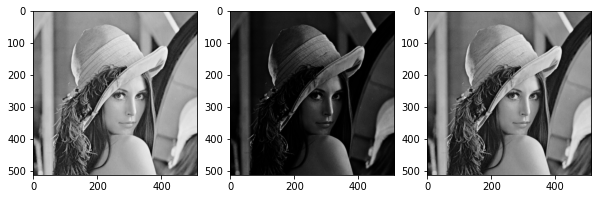

In [ ]:
image = cv2.imread('Lenna_(test_image).png',0
                   )
print(image)
gamma = 0.5
img_1 = (255 * (image/255) **gamma)
print(img_1)
gamma = 4.0
img_2 = (255 * (image/255) **gamma)
print(img_2)
fig, axs = plt.subplots(1,3 ,figsize=(10, 20))
axs[0].imshow(img_1, cmap='gray') 
axs[1].imshow(img_2, cmap='gray')
axs[2].imshow(image, cmap='gray')

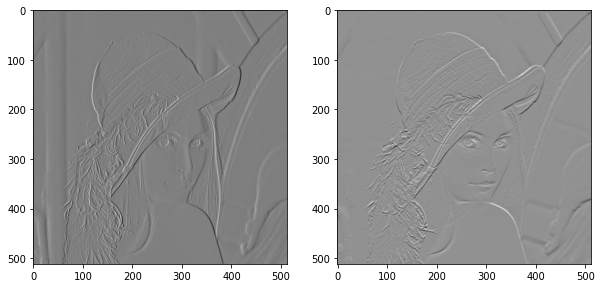

In [ ]:

kernel = np.array([[-1,1]])
img = cv2.imread('Lenna_(test_image).png',0)
dst = cv2.filter2D(img.astype(np.float64),-1,kernel)
dstnrml = cv2.normalize(dst,  dst, 0, 255, cv2.NORM_MINMAX)
dst1 = cv2.filter2D(img.astype(np.float64),-1,kernel.T)
dstnrml1 = cv2.normalize(dst1,  dst1, 0, 255, cv2.NORM_MINMAX)
fig, axs = plt.subplots(1,2,figsize=(10, 10))
axs[0].imshow(dstnrml, cmap='gray')
axs[1].imshow(dst1, cmap='gray') 


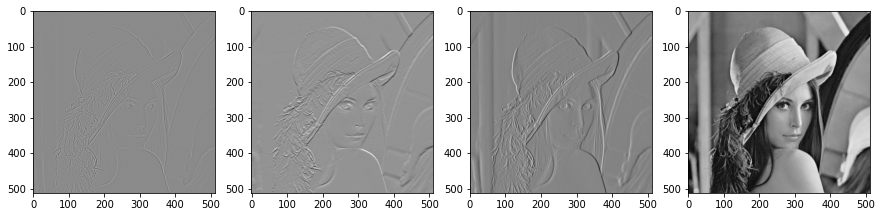

In [ ]:
#image = cv2.imread('Lenna_(test_image).png',0)
#kernel = ([[-1,1]])


laplacian = cv2.Laplacian(image,cv2.CV_64F)
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
fig, axs = plt.subplots(1,4,figsize=(15, 30))
axs[0].imshow(laplacian, cmap='gray') 
axs[1].imshow(sobely, cmap='gray')
axs[2].imshow(sobelx, cmap='gray')
axs[3].imshow(image, cmap='gray')


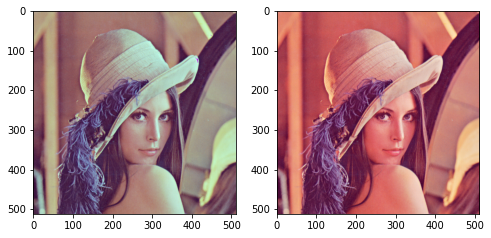

In [ ]:
#Grayworld Balancing Technique
image = cv2.imread('Lenna_(test_image).png')
i=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
avg_a = np.average(img[:, :, 1])
avg_b = np.average(img[:, :, 2])
avg_c = np.average(img[:, :, 0])

img[:, :, 1] = img[:, :, 1] - ((avg_a - 128) * (img[:, :, 0] / 255.0) )
img[:, :, 2] = img[:, :, 2] - ((avg_b - 128) * (img[:, :, 0] / 255.0) )
img[:, :, 0] = img[:, :, 0] - ((avg_c - 128) * (img[:, :, 0] / 255.0) )


fig, axs = plt.subplots(1,2,figsize=(8, 8))
axs[0].imshow(img) 
axs[1].imshow(i) 





In [ ]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

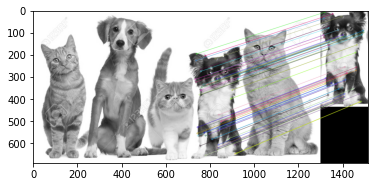

(<matplotlib.image.AxesImage at 0x7feab39c4ef0>, None)

In [ ]:
# Matching Objects in diiferent image.
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('im1.jpg')  
img2 = cv2.imread('im2.JPG') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()